# Animated Scatter Plot

Reproduction of Hans Rosling’s famous animation.
https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen

Data Source: https://www.gapminder.org/data/

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import imageio

## Read data

In [4]:
fertility_df = pd.read_csv('data/spiced/gapminder_total_fertility.csv', index_col=0)
lifeexp_df = pd.read_excel('data/spiced/gapminder_lifeexpectancy.xlsx')
population_df = pd.read_excel('data/spiced/gapminder_population.xlsx')
continents_df = pd.read_csv('data/spiced/continents.csv', sep=';')

The following is overengineered for this specific case.

It could have also been done with `df.set_axis(df.columns.astype(int), axis=1)` or `df.columns = df.columns.astype(int)`

In [5]:
def to_int_if_possible(item):
    try:
        return int(item)
    except ValueError:
        return item

fertility_df.set_axis(fertility_df.columns.map(to_int_if_possible), axis=1, inplace=True)

In [6]:
fertility_df.index.rename('country', inplace=True) # alternative: df.index.name = 'country'
fertility_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [7]:
lifeexp_df.rename(columns={'Life expectancy':'country'}, inplace=True)
lifeexp_df.set_index('country', inplace=True)
lifeexp_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [8]:
population_df.rename(columns={'Total population':'country'}, inplace=True)
population_df.set_index('country', inplace=True)
population_df.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


### Inspect shapes

In [9]:
fertility_df.shape

(260, 216)

In [10]:
lifeexp_df.shape

(260, 217)

In [11]:
population_df.shape

(275, 81)

In [12]:
fertility_df.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='country', length=260)

## Convert tables to long format

In [13]:
fertility_df.reset_index(inplace=True)

In [14]:
fertility_long_df = fertility_df.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [15]:
fertility_long_df.shape

(56160, 3)

In [16]:
population_df.reset_index(inplace=True)

In [17]:
population_long_df = population_df.melt(id_vars='country', var_name='year', value_name='population')

In [18]:
lifeexp_df.reset_index(inplace=True)

In [19]:
lifeexp_long_df = lifeexp_df.melt(id_vars='country', var_name='year', value_name='life_expectancy')

## Merge tables

In [20]:
df = fertility_long_df.merge(population_long_df)
df = df.merge(lifeexp_long_df)
df = df.merge(continents_df, on='country', how='left')

In [21]:
df.head()

,country,year,fertility_rate,population,life_expectancy,continent
0,Abkhazia,1800,NaN,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21,Asia
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40,Europe
4,Algeria,1800,6.99,2503218.0,28.82,Africa


In [22]:
df.shape

(20979, 6)

<AxesSubplot:>

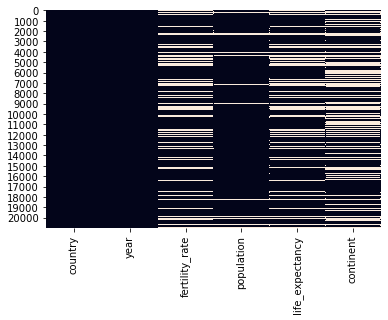

In [23]:
sns.heatmap(df.isnull(), cbar = False)

## Plotting

### Sanity check

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

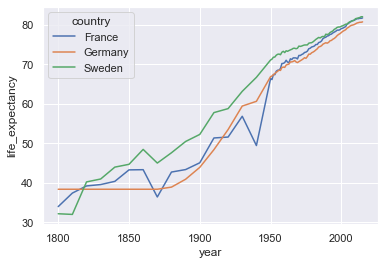

In [24]:
sns.set()
df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
             data=df_subset)

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

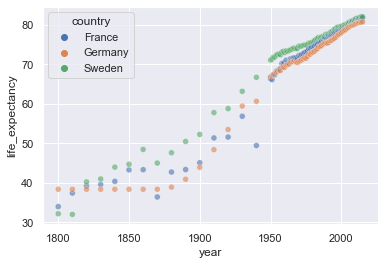

In [25]:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
                data=df_subset, alpha=0.6)

### Famous scatter plot
#### Single frame
Hans Rosling projected:
  - fertility rate on x-ais
  - life expectancy on y-axis
  - population on bubble size.

In [26]:
df_subset = df.loc[df['year'].eq(2015)]
df_subset.head()

,country,year,fertility_rate,population,life_expectancy,continent
20720,Abkhazia,2015,NaN,NaN,NaN,NaN
20721,Afghanistan,2015,4.47,32526562.0,53.8,Asia
20722,Akrotiri and Dhekelia,2015,NaN,NaN,NaN,NaN
20723,Albania,2015,1.78,2896679.0,78.0,Europe
20724,Algeria,2015,2.71,39666519.0,76.4,Africa


count    1.996500e+04
mean     1.803661e+07
std      8.162064e+07
min      5.000000e+01
25%      1.349140e+05
50%      2.262485e+06
75%      9.493656e+06
max      1.376049e+09
Name: population, dtype: float64

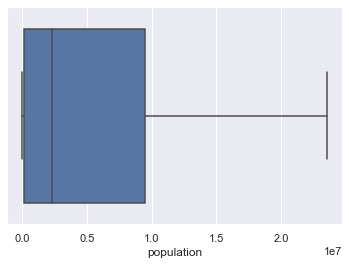

In [27]:
# look at population distribution
sns.boxplot(x=df['population'], showfliers=False) # without outliers
df['population'].describe()

In [28]:
sns.set_theme(style='white')

In [29]:
def plot_frame(ax, df, year, limits=(1, 8.6, 27, 85.2)):
    """ limits: (xmin, xmax, ymin, ymax) """
    
    year = int(year)
    df_subset = df.loc[ df['year'].eq(year) ]
    
    sns.scatterplot(  x     = 'fertility_rate'
                    , y     = 'life_expectancy'
                    , hue   = 'continent'
                    , size  = 'population'
                    , sizes = (15,700)
                    , size_norm = (50,1_000_000_000)
                    , data  = df_subset
                    , alpha = 0.6
                    , ax    = ax)
    sns.despine(ax=ax)
    ax.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0.1)
    ax.set_xlabel('Fertility Rate')
    ax.set_ylabel('Life Expectancy')
    ax.set_title('Year: {}'.format(year))
    
    if limits is not None:
        ax.axis(limits)
    return ax.axis() # return current limits

<AxesSubplot:title={'center':'Year: 1960'}, xlabel='Fertility Rate', ylabel='Life Expectancy'>

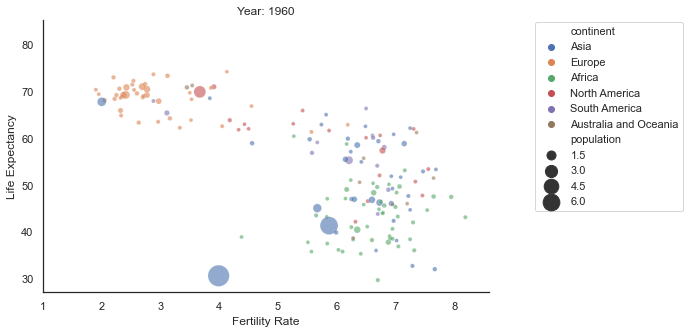

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
plot_frame(ax=ax, df=df, year=1960)
fig.savefig('test_frame.png', dpi=90, bbox_inches='tight')
ax

<AxesSubplot:title={'center':'Year: 1985'}, xlabel='Fertility Rate', ylabel='Life Expectancy'>

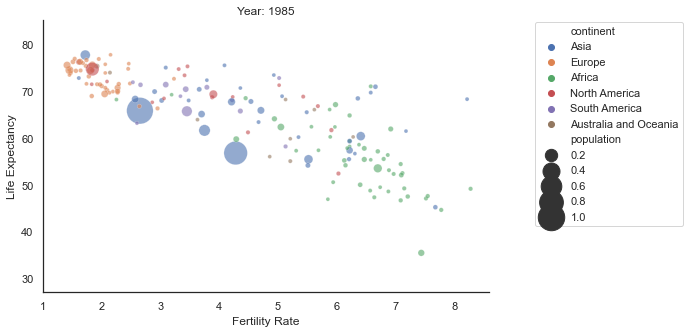

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
plot_frame(ax=ax, df=df, year=1985)
#fig.savefig('test_frame.png', dpi=90, bbox_inches='tight')
ax

#### Animation between 1960 and 2015

In [32]:
import imageio

images = []

for year in range(1960, 2015+1):
    filename = 'lifeexp_{}.png'.format(year)
    
    fig, ax = plt.subplots(figsize=(8,5))
    plot_frame(ax=ax, df=df, year=year)    
    fig.savefig(filename, dpi=90, bbox_inches='tight')    
    plt.close('all')
    print(filename, "written")
    
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

lifeexp_1960.png written
lifeexp_1961.png written
lifeexp_1962.png written
lifeexp_1963.png written
lifeexp_1964.png written
lifeexp_1965.png written
lifeexp_1966.png written
lifeexp_1967.png written
lifeexp_1968.png written
lifeexp_1969.png written
lifeexp_1970.png written
lifeexp_1971.png written
lifeexp_1972.png written
lifeexp_1973.png written
lifeexp_1974.png written
lifeexp_1975.png written
lifeexp_1976.png written
lifeexp_1977.png written
lifeexp_1978.png written
lifeexp_1979.png written
lifeexp_1980.png written
lifeexp_1981.png written
lifeexp_1982.png written
lifeexp_1983.png written
lifeexp_1984.png written
lifeexp_1985.png written
lifeexp_1986.png written
lifeexp_1987.png written
lifeexp_1988.png written
lifeexp_1989.png written
lifeexp_1990.png written
lifeexp_1991.png written
lifeexp_1992.png written
lifeexp_1993.png written
lifeexp_1994.png written
lifeexp_1995.png written
lifeexp_1996.png written
lifeexp_1997.png written
lifeexp_1998.png written
lifeexp_1999.png written
